# Train Custom Model Using Scikit Learn - Bench Press
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('benchpress_coords_merged.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139


In [4]:
print(df['class'].unique())

['b_correct' 'b_excessive_arch' 'b_arms_spread']


In [5]:
df[df['class'] == 'b_correct']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,b_correct,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,-0.892839,0.994734,0.979807,0.611790,-0.042018,0.975278,0.725297,0.738664,-1.020206,0.997877
1,b_correct,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,-0.707418,0.985596,0.972952,0.608905,-0.118859,0.956751,0.724160,0.736117,-0.862484,0.994825
2,b_correct,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,-0.764271,0.978585,0.978824,0.608172,-0.101540,0.941800,0.723257,0.737576,-0.921502,0.993139
3,b_correct,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,-0.635539,0.980626,0.981234,0.604804,-0.016468,0.940290,0.719281,0.736312,-0.785139,0.994317
4,b_correct,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,-0.825383,0.985708,0.987015,0.609234,-0.114778,0.966898,0.723577,0.738962,-0.948455,0.994775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,b_correct,0.509460,0.363935,0.695913,0.999999,0.519557,0.364855,0.738890,0.999999,0.527089,...,0.016463,0.948477,0.822400,0.742404,-0.075637,0.901070,0.187731,0.735606,-0.116777,0.960733
800,b_correct,0.514738,0.363740,0.822302,0.999999,0.522630,0.365405,0.866516,0.999999,0.530004,...,-0.051480,0.966948,0.821852,0.740291,-0.193750,0.912899,0.193328,0.737935,-0.213983,0.971317
801,b_correct,0.514939,0.365350,0.690673,0.999999,0.524844,0.365672,0.729629,0.999999,0.532197,...,0.006326,0.955366,0.823336,0.741550,-0.092516,0.900482,0.192893,0.735559,-0.118608,0.965914
802,b_correct,0.507485,0.362670,0.746759,1.000000,0.515006,0.364847,0.794346,0.999999,0.522574,...,-0.059394,0.964655,0.820075,0.741098,-0.184308,0.918762,0.193260,0.738219,-0.218908,0.973849


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['b_arms_spread', 'b_excessive_arch', 'b_arms_spread', 'b_correct',
       'b_excessive_arch', 'b_arms_spread', 'b_excessive_arch',
       'b_arms_spread', 'b_arms_spread', 'b_excessive_arch',
       'b_arms_spread', 'b_arms_spread', 'b_arms_spread', 'b_correct',
       'b_arms_spread', 'b_arms_spread', 'b_arms_spread',
       'b_excessive_arch', 'b_arms_spread', 'b_excessive_arch',
       'b_excessive_arch', 'b_excessive_arch', 'b_excessive_arch',
       'b_excessive_arch', 'b_correct', 'b_excessive_arch',
       'b_arms_spread', 'b_excessive_arch', 'b_correct',
       'b_excessive_arch', 'b_arms_spread', 'b_correct',
       'b_excessive_arch', 'b_correct', 'b_arms_spread', 'b_correct',
       'b_correct', 'b_correct', 'b_excessive_arch', 'b_arms_spread',
       'b_excessive_arch', 'b_excessive_arch', 'b_arms_spread',
       'b_correct', 'b_correct', 'b_correct', 'b_arms_spread',
       'b_correct', 'b_arms_spread', 'b_excessive_arch', 'b_correct',
       'b_arms_spread', 'b_exc

## 3.Evaluate and Serialize Model

In [12]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                  precision    recall  f1-score   support

   b_arms_spread       0.99      1.00      1.00       111
       b_correct       1.00      0.98      0.99        85
b_excessive_arch       0.99      1.00      0.99        91

        accuracy                           0.99       287
       macro avg       0.99      0.99      0.99       287
    weighted avg       0.99      0.99      0.99       287


--- rc 모델 분류 결과 평가 ---
                  precision    recall  f1-score   support

   b_arms_spread       0.99      0.96      0.98       111
       b_correct       0.95      0.98      0.97        85
b_excessive_arch       0.99      1.00      0.99        91

        accuracy                           0.98       287
       macro avg       0.98      0.98      0.98       287
    weighted avg       0.98      0.98      0.98       287


--- rf 모델 분류 결과 평가 ---
                  precision    recall  f1-score   support

   b_arms_spread       1.00      1.00      1.00     

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965
--- precision ---
lr: 0.9931
rc: 0.9794
rf: 0.9966
gb: 0.9966
--- recall ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965
--- f1-score ---
lr: 0.9930
rc: 0.9791
rf: 0.9965
gb: 0.9965


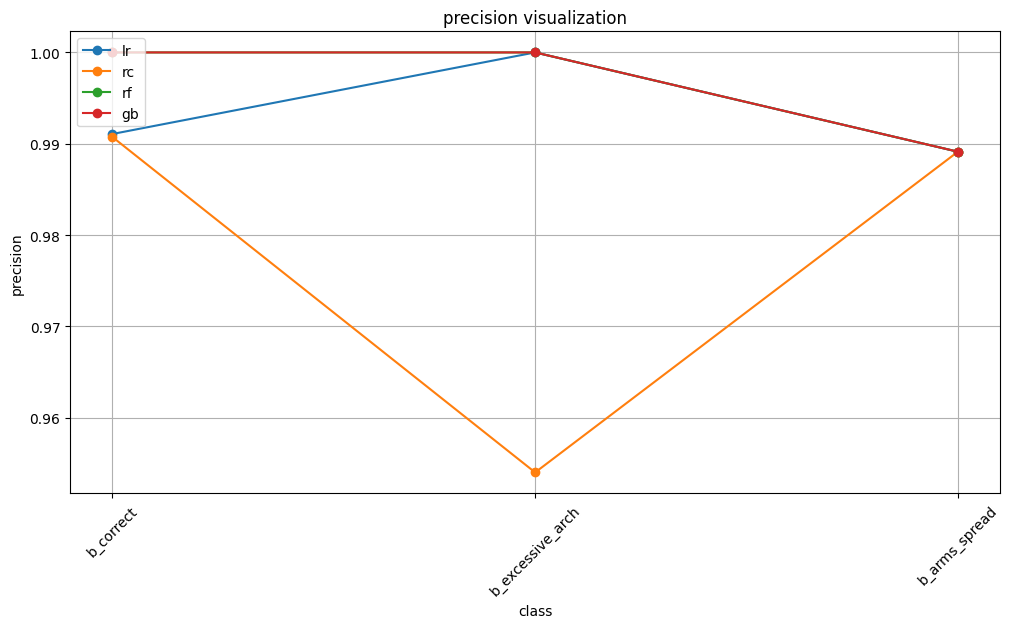

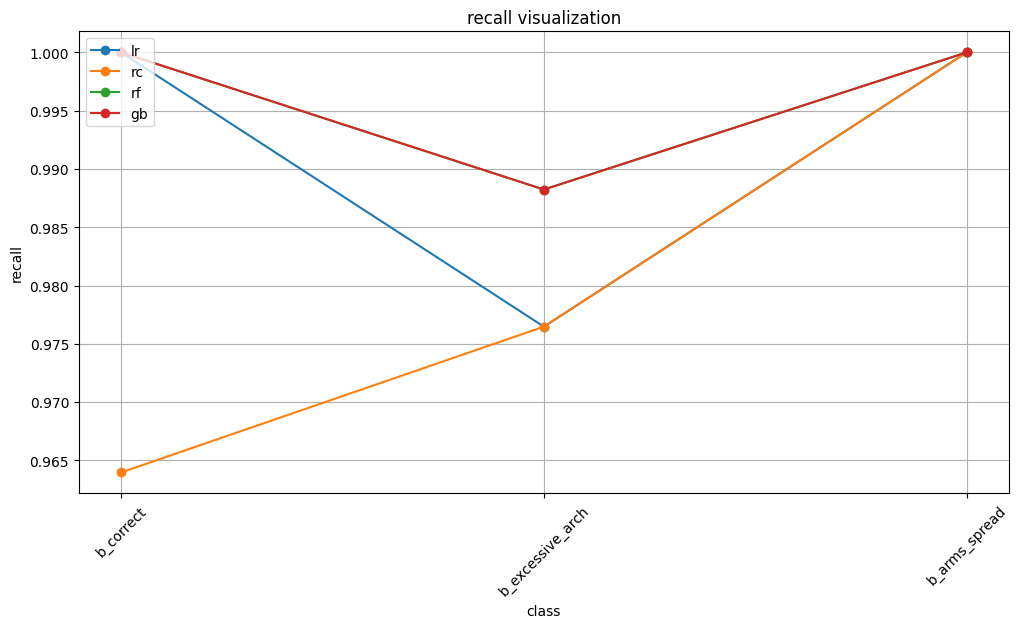

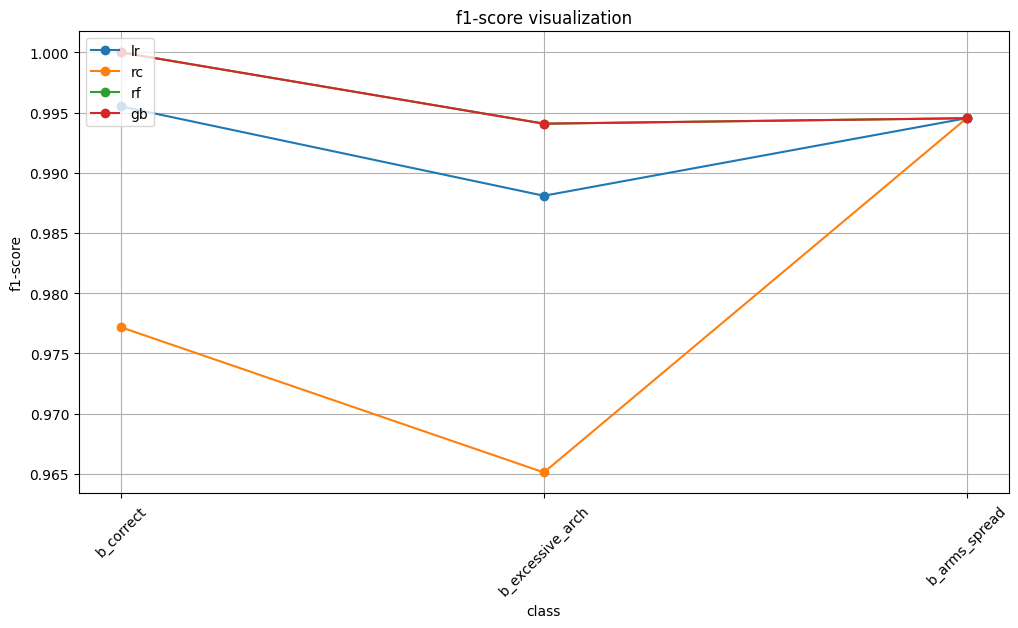

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [15]:
with open('benchpress_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)